In [1]:
import networkx as nx         #pacchetto per reti
import numpy as np
import ipyparallel as ipp     #pacchetto per parallelizzazione
import time as clock
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
import pickle
#import winsound
from Node import *            #pacchetto agente Node
from NetworkTool import *     #pacchetto rete
from GenerativeTool import *  #pacchetto generazione rete
from VoteTool import *        #pacchetto analisi voto
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def Core(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime):
     
    for i in range(Nodes):
        tfix=list(-2*np.random.random(FB)+1)
        tvar=list(-2*np.random.random(VB)+1)
        MG.add_node(Node(MG.number_of_nodes(),tfix,tvar, np.random.random(),TheTime)) #create nodes with FB fix belief and VB var beli
        
    TheTime=TheTime+1

    for i in range(MG.number_of_nodes()):
        tlay = np.random.randint(LayerC)
        MG.nodes()[i].aggF(TheTime)
        AttachChoosenBelief(MG, MG.nodes()[i], np.random.randint(RndFr)+1, tlay, fbpos[tlay], fbdist[tlay], vbpos[tlay], vbdist[tlay],TheTime) #every node search for friends
    print(' Time ', TheTime)

In [3]:
def Grow(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime):
    for j in range(Iter): #creating and adding
        TheTime = TheTime+1
        LayerB = ((LayerA-LayerC)//(Iter-1))*j + LayerC
        NodesB = NodesA//Iter
        print('Iter ',j,' Layers ', LayerB, ' Time ', TheTime)
        for i in range(NodesB):
            tfix=list(-2*np.random.random(FB)+1)
            tvar=list(-2*np.random.random(VB)+1)
            tnew = Node(MG.number_of_nodes(), tfix, tvar, np.random.random(), TheTime) #create nodes with FB fix belief and VB var belief
            MG.add_node(tnew) 
            tnew.aggF(TheTime)
            tlay = np.random.randint(LayerB)
            AttachChoosenBelief(MG, tnew, np.random.randint(RndFr)+1, tlay, fbpos[tlay], fbdist[tlay], vbpos[tlay], vbdist[tlay], TheTime)

    print(MG.number_of_nodes())
    print(' Time ', TheTime)

In [4]:
def Rand(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime):
    TheTime=TheTime+1 
    co=0
    while MG.number_of_nodes()<NodesA:
        tfix=list(-2*np.random.random(FB)+1)
        tvar=list(-2*np.random.random(VB)+1)
        tnew = Node(MG.number_of_nodes(), tfix, tvar, np.random.random(), TheTime) #create nodes with FB fix belief and VB var belief
        MG.add_node(tnew) 
        tnew.aggF(TheTime)
        
    for i in MG.nodes():
        if len(MG.neighbors(i))==0:
            co=co+1
            RandomLink(MG, i, LayerA, TheTime)
    print("added: ",co,'; percentage: ', (co/MG.number_of_nodes())*100,'% ')
    print(' Time ', TheTime)
    return(co/MG.number_of_nodes())


 {'proj': {2000: [], 3000: [], 0.2: [], 500: [], 5: [], 8: [], 1000: [], 4: [], 10: [], 12: []}, 'alay': {2000: [], 3000: [], 0.2: [], 500: [], 5: [], 8: [], 1000: [], 4: [], 10: [], 12: []}}

 Repetition 0

 Setup 500 5 10 4 0.2
 Time  0

 [0.6304594255457658, 0.23082871553683693, 0.350087744660015, 0.33744389609578407] 
 [[3, 1, 3], [4, 1, 3], [2, 3, 3, 0], [2, 1, 4]] 
 [0.6060888209758266, 0.2620328991616026, 0.42246844582890847, 0.4497328272107596] 
 [[6, 5, 2, 6], [5, 3, 1, 2], [0, 4, 9, 5, 1, 4, 7, 8], [7, 7, 4]] 
 [[4, 2, 5, 0, 8, 5, 0, 4, 1], [8, 8, 9, 3, 3, 2, 7, 1], [7, 0, 1, 9, 6, 7, 3, 0], [6, 0]]
 Time  1
Iter  0  Layers  2  Time  1
Iter  1  Layers  3  Time  2
Iter  2  Layers  4  Time  3
548
 Time  3
added:  138 ; percentage:  25.18248175182482 % 
 Time  1
0.2518248175182482
0
complete assortativity  0.0406502009758

Layer 0
assortativity  0.152804753977
clustering  0.040079365079365076
averagedegree  2.04838709677
nodes  372

Layer 1
assortativity  0.0709677419355
cluste

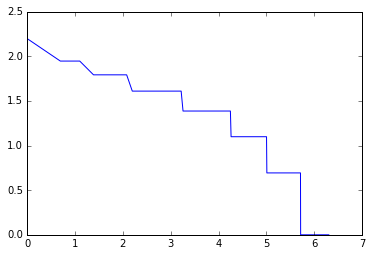


 {'proj': {2000: [], 3000: [], 0.2: [0.12825490324471231], 500: [0.12825490324471231], 5: [0.12825490324471231], 8: [], 1000: [], 4: [0.12825490324471231], 10: [0.12825490324471231], 12: []}, 'alay': {2000: [], 3000: [], 0.2: [0.068398327597918182], 500: [0.068398327597918182], 5: [0.068398327597918182], 8: [], 1000: [], 4: [0.068398327597918182], 10: [0.068398327597918182], 12: []}} 
 {'proj': {2000: [], 3000: [], 0.2: [-0.51255540275823985], 500: [-0.51255540275823985], 5: [-0.51255540275823985], 8: [], 1000: [], 4: [-0.51255540275823985], 10: [-0.51255540275823985], 12: []}, 'alay': {2000: [], 3000: [], 0.2: [-0.25481440878742434], 500: [-0.25481440878742434], 5: [-0.25481440878742434], 8: [], 1000: [], 4: [-0.25481440878742434], 10: [-0.25481440878742434], 12: []}} 
------------------------------------------

 Setup 500 5 10 8 0.2
 Time  0

 [0.22701109004315467, 0.2192915482794192, 0.5165353008533082, 0.40406212181217965, 0.6940196968752024, 0.6207595419833661, 0.4585492541227896

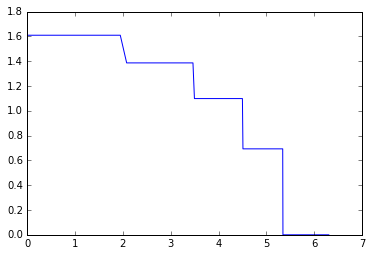


 {'proj': {2000: [], 3000: [], 0.2: [0.12825490324471231, 0.090011217894826093], 500: [0.12825490324471231, 0.090011217894826093], 5: [0.12825490324471231, 0.090011217894826093], 8: [0.090011217894826093], 1000: [], 4: [0.12825490324471231], 10: [0.12825490324471231, 0.090011217894826093], 12: []}, 'alay': {2000: [], 3000: [], 0.2: [0.068398327597918182, 0.049197776306227084], 500: [0.068398327597918182, 0.049197776306227084], 5: [0.068398327597918182, 0.049197776306227084], 8: [0.049197776306227084], 1000: [], 4: [0.068398327597918182], 10: [0.068398327597918182, 0.049197776306227084], 12: []}} 
 {'proj': {2000: [], 3000: [], 0.2: [-0.51255540275823985, -0.44962894723747254], 500: [-0.51255540275823985, -0.44962894723747254], 5: [-0.51255540275823985, -0.44962894723747254], 8: [-0.44962894723747254], 1000: [], 4: [-0.51255540275823985], 10: [-0.51255540275823985, -0.44962894723747254], 12: []}, 'alay': {2000: [], 3000: [], 0.2: [-0.25481440878742434, -0.19828884871235716], 500: [-0.2

C:\Users\Francesco\Anaconda4\lib\site-packages\networkx\algorithms\assortativity\correlation.py:285: RuntimeWarning: invalid value encountered in double_scalars
  return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)


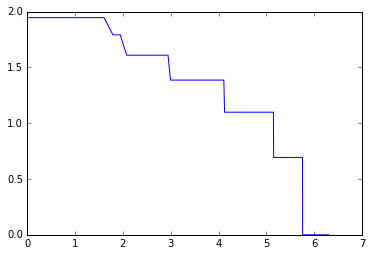

C:\Users\Francesco\Anaconda4\lib\site-packages\scipy\stats\stats.py:4354: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
C:\Users\Francesco\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
C:\Users\Francesco\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in less
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
C:\Users\Francesco\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:1749: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)



 {'proj': {2000: [], 3000: [], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576], 8: [0.090011217894826093], 1000: [], 4: [0.12825490324471231], 10: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576], 12: [0.14293373719359576]}, 'alay': {2000: [], 3000: [], 0.2: [0.068398327597918182, 0.049197776306227084, nan], 500: [0.068398327597918182, 0.049197776306227084, nan], 5: [0.068398327597918182, 0.049197776306227084, nan], 8: [0.049197776306227084], 1000: [], 4: [0.068398327597918182], 10: [0.068398327597918182, 0.049197776306227084, nan], 12: [nan]}} 
 {'proj': {2000: [], 3000: [], 0.2: [-0.51255540275823985, -0.44962894723747254, -0.49677752518767315], 500: [-0.51255540275823985, -0.44962894723747254, -0.49677752518767315], 5: [-0.51255540275823985, -0.44962894723747254, -0.49677752518767315], 8: [-0.44962894723747

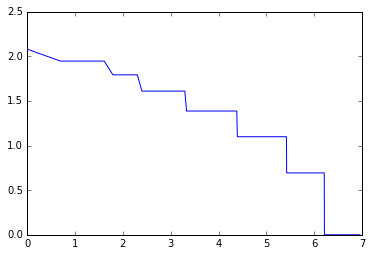


 {'proj': {2000: [], 3000: [], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487], 8: [0.090011217894826093], 1000: [0.1136435640092487], 4: [0.12825490324471231, 0.1136435640092487], 10: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487], 12: [0.14293373719359576]}, 'alay': {2000: [], 3000: [], 0.2: [0.068398327597918182, 0.049197776306227084, nan, 0.057682258953506871], 500: [0.068398327597918182, 0.049197776306227084, nan], 5: [0.068398327597918182, 0.049197776306227084, nan, 0.057682258953506871], 8: [0.049197776306227084], 1000: [0.057682258953506871], 4: [0.068398327597918182, 0.057682258953506871], 10: [0.068398327597918182, 0.049197776306227084, nan, 0.057682258953506871], 12: [nan]}} 
 {'proj': {2000: [], 3000: [], 0.2: [-0.51255540275823985, -0.4

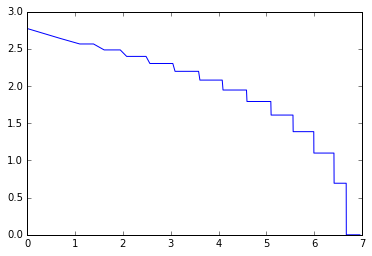


 {'proj': {2000: [], 3000: [], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706], 8: [0.090011217894826093, 0.16108753516484706], 1000: [0.1136435640092487, 0.16108753516484706], 4: [0.12825490324471231, 0.1136435640092487], 10: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706], 12: [0.14293373719359576]}, 'alay': {2000: [], 3000: [], 0.2: [0.068398327597918182, 0.049197776306227084, nan, 0.057682258953506871, nan], 500: [0.068398327597918182, 0.049197776306227084, nan], 5: [0.068398327597918182, 0.049197776306227084, nan, 0.057682258953506871, nan], 8: [0.049197776306227084, nan], 1000: [0.057682258953506871, nan], 4: [0.068398327597918182, 0.057682258953506871], 10: [0.068398327597918182, 0

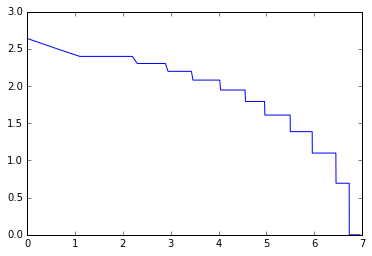


 {'proj': {2000: [], 3000: [], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409], 8: [0.090011217894826093, 0.16108753516484706], 1000: [0.1136435640092487, 0.16108753516484706, 0.13968851385020409], 4: [0.12825490324471231, 0.1136435640092487], 10: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409], 12: [0.14293373719359576, 0.13968851385020409]}, 'alay': {2000: [], 3000: [], 0.2: [0.068398327597918182, 0.049197776306227084, nan, 0.057682258953506871, nan, 0.080212042803155512], 500: [0.068398327597918182, 0.049197776306227084, nan], 5: [0.068398327597918182, 0.049197776306227084, nan, 0.057682258953506871, nan, 0.0802120428031555

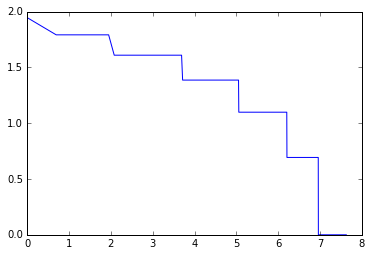


 {'proj': {2000: [0.13320297749111076], 3000: [], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076], 8: [0.090011217894826093, 0.16108753516484706], 1000: [0.1136435640092487, 0.16108753516484706, 0.13968851385020409], 4: [0.12825490324471231, 0.1136435640092487, 0.13320297749111076], 10: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076], 12: [0.14293373719359576, 0.13968851385020409]}, 'alay': {2000: [0.064522691986576883], 3000: [], 0.2: [0.068398327597918182, 0.049197776306227084, nan, 0.057682258953506871, nan, 0.080212042803155512, 0.064522691986576883], 500: [0.0

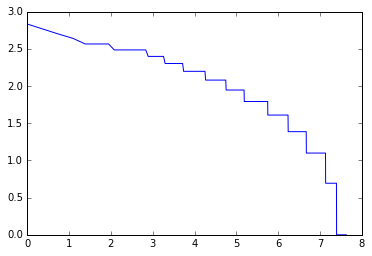


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276], 3000: [], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276], 8: [0.090011217894826093, 0.16108753516484706, 0.14672756140927276], 1000: [0.1136435640092487, 0.16108753516484706, 0.13968851385020409], 4: [0.12825490324471231, 0.1136435640092487, 0.13320297749111076], 10: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276], 12: [0.14293373719359576, 0.13968851385020409]}, 'alay': {2000: [0.064522691986576883, 0.087317121658054414], 3000: [], 0.2: [0.0

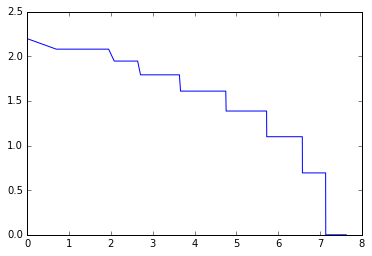


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046], 3000: [], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046], 8: [0.090011217894826093, 0.16108753516484706, 0.14672756140927276], 1000: [0.1136435640092487, 0.16108753516484706, 0.13968851385020409], 4: [0.12825490324471231, 0.1136435640092487, 0.13320297749111076], 10: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046], 12: [0.14293373719359576, 0.13968851385020409

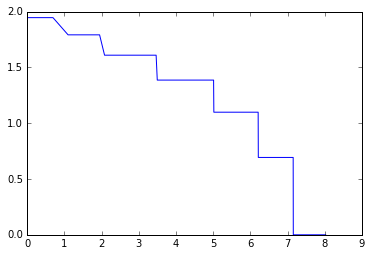


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046], 3000: [0.1046814565046853], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853], 8: [0.090011217894826093, 0.16108753516484706, 0.14672756140927276], 1000: [0.1136435640092487, 0.16108753516484706, 0.13968851385020409], 4: [0.12825490324471231, 0.1136435640092487, 0.13320297749111076, 0.1046814565046853], 10: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756

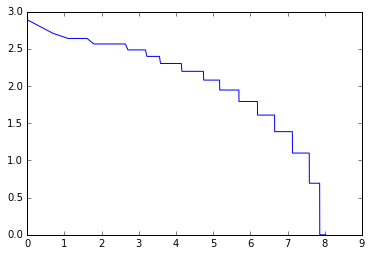


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046], 3000: [0.1046814565046853, 0.11820297600086187], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187], 8: [0.090011217894826093, 0.16108753516484706, 0.14672756140927276, 0.11820297600086187], 1000: [0.1136435640092487, 0.16108753516484706, 0.13968851385020409], 4: [0.12825490324471231, 0.1136435640092487, 0.13320297749111076, 0.1046814565046853], 10: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435

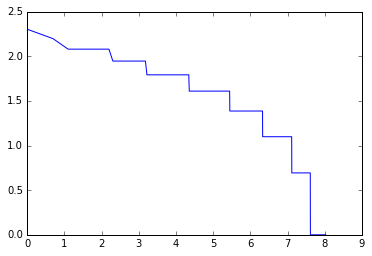


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798], 8: [0.090011217894826093, 0.16108753516484706, 0.14672756140927276, 0.11820297600086187], 1000: [0.1136435640092487, 0.16108753516484706, 0.13968851385020409], 4: [0.12825490324471231, 0.1136435640092487, 0.13320297749111076, 0.1046814565046853], 10: [0.12825490

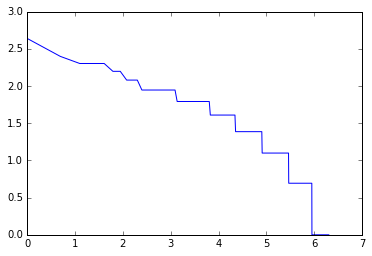


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842], 8: [0.090011217894826093, 0.16108753516484706, 0.14672756140927276, 0.11820297600086187], 1000: [0.1136435640092487, 0.16108753516484706, 0.13968851385020409], 4: [0.12825490324471231, 0.113643564009

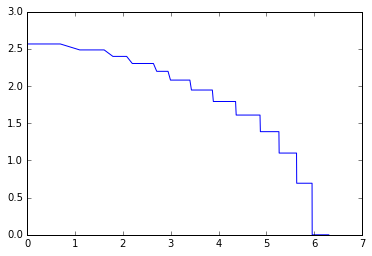


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026], 8: [0.090011217894826093, 0.16108753516484706, 0.14672756140927276, 0.11820297600086187, 0.157374457675026], 1000: [0.1136435640092487, 0.1610

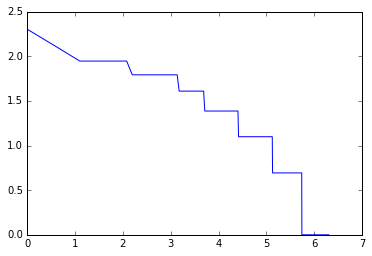


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026, 0.12666673468429965], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965], 8: [0.090011217894826093, 0.16108753516484706, 0.14672756140927276, 0.118202976

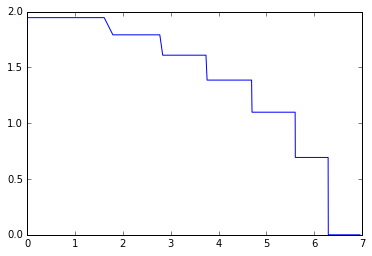


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026, 0.12666673468429965], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974], 8: [0.090011217894826093, 0.161087535

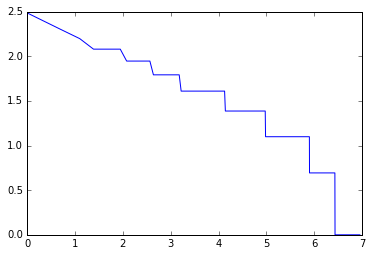


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026, 0.12666673468429965], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.143607946559641

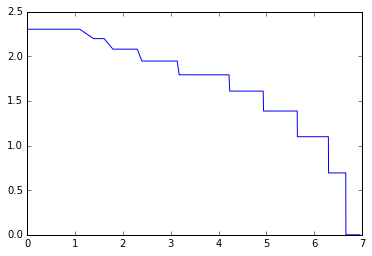


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026, 0.12666673468429965], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.124458878054329

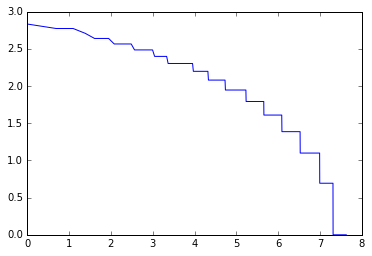


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026, 0.12666673468429965], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.1573744576750

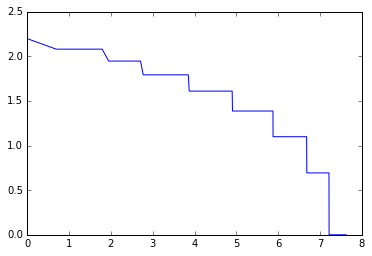


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026, 0.12666673468429965], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.1542037820998

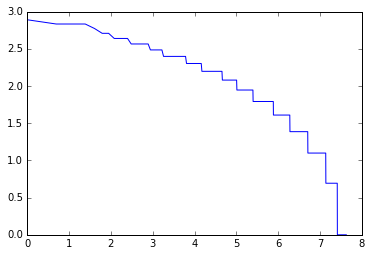


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026, 0.12666673468429965], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.104681456504

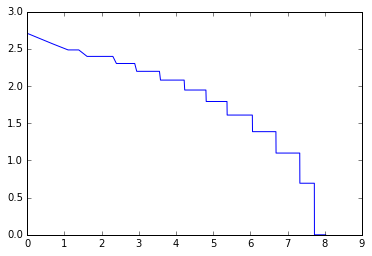


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026, 0.12666673468429965], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.146727561409

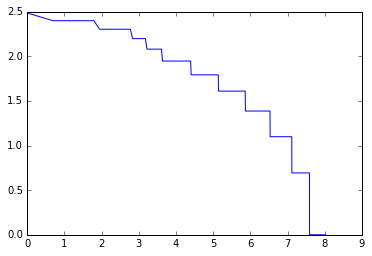


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026, 0.12666673468429965], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.139688513850

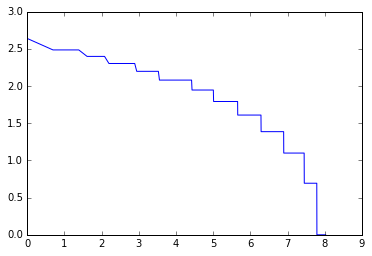


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026, 0.12666673468429965], 5: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.11364356400

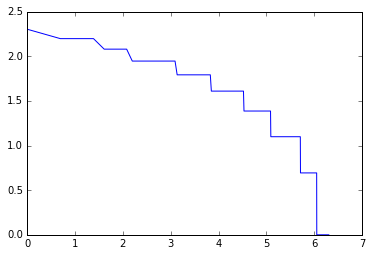


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.14285206771747883], 5: [0.12825490324471231, 0.090011217894

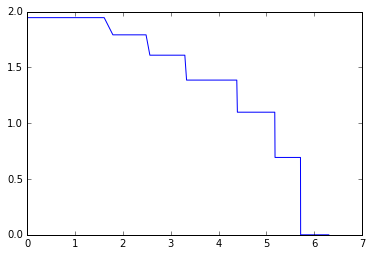


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.14285206771747883, 0.13934891231726357

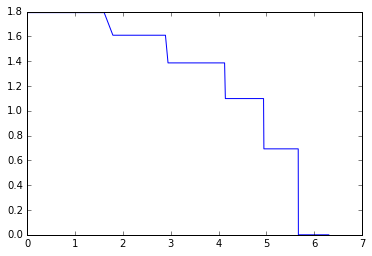


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.14285206771747883

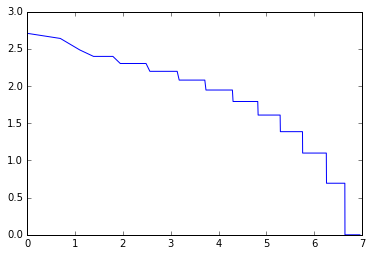


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026, 0.12666673468429965

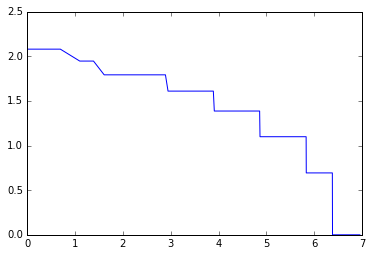


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899, 0.14456374434458727], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.13607084634377842, 0.157374457675026

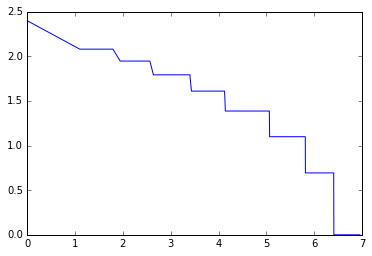


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899, 0.14456374434458727, 0.13546135403529644], 500: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.136070846343778

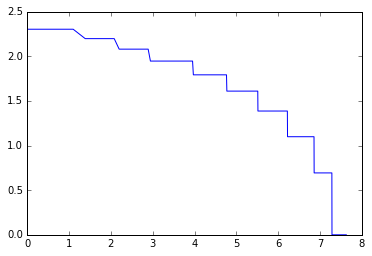


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899, 0.14456374434458727, 0.13546135403529644, 0.15124941769314873], 500: [0.12825490324471231, 0.0900112178948260

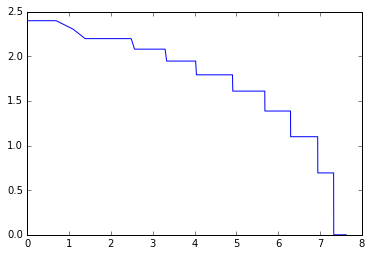


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899, 0.14456374434458727, 0.13546135403529644, 0.15124941769314873, 0.15014626944371304], 500

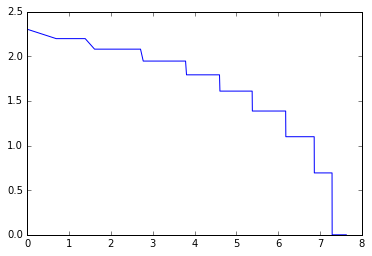


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899, 0.14456374434458727, 0.13546135403529644, 0.15124941769314873, 0.15

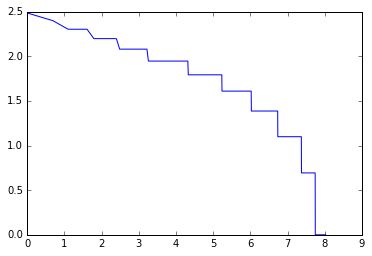


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899, 0.14456374434458727, 0.13546135403529644, 0.151

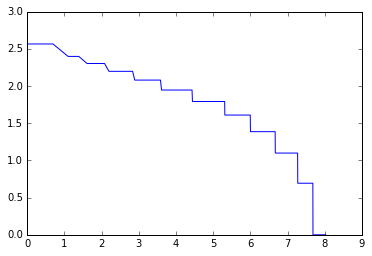


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899, 0.14456374434458727, 0.135

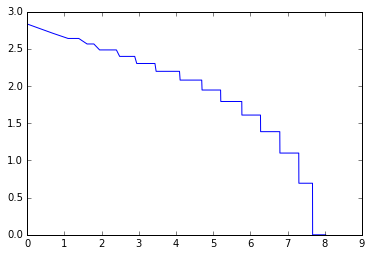


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899, 0.144

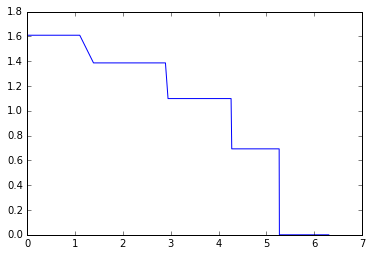


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899, 0.144

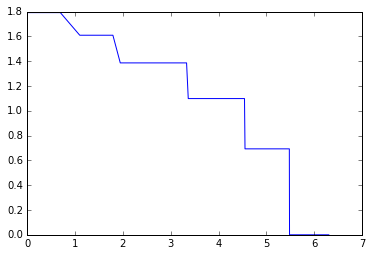


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899, 0.144

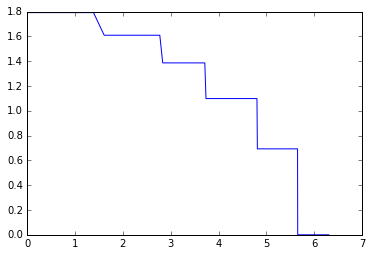


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899, 0.144

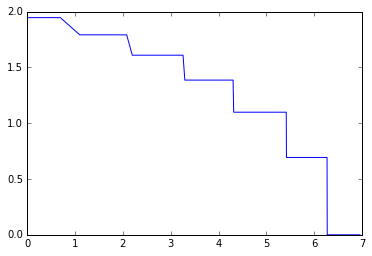


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899, 0.144

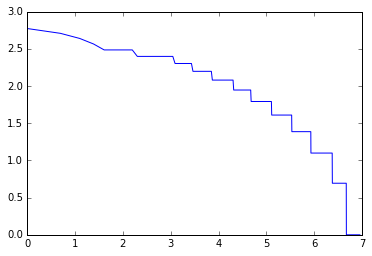


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899, 0.144

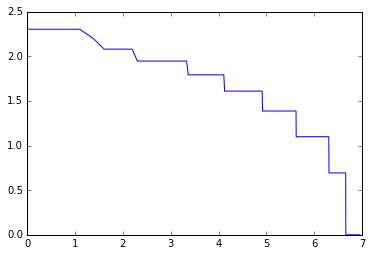


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.14287288264671899, 0.144

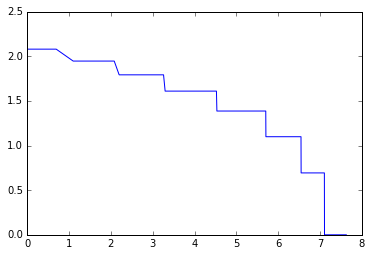


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203, 0.1511255239262338], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.12814728747344079, 0.1428

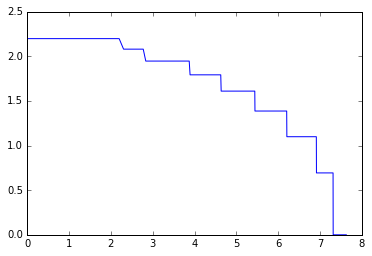


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203, 0.1511255239262338, 0.15172565454666986], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.13934891231726357, 0.1281

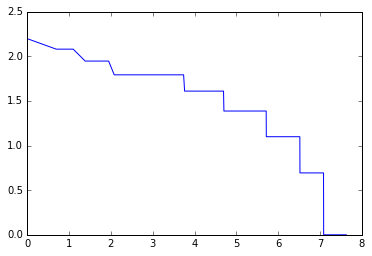


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203, 0.1511255239262338, 0.15172565454666986, 0.14560516665524079], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.14285206771747883, 0.1393

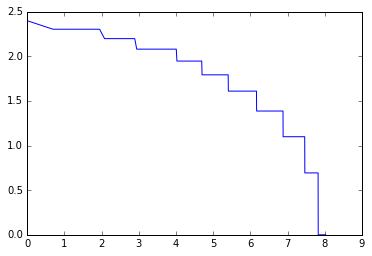


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203, 0.1511255239262338, 0.15172565454666986, 0.14560516665524079], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332, 0.12928775834908782], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1428

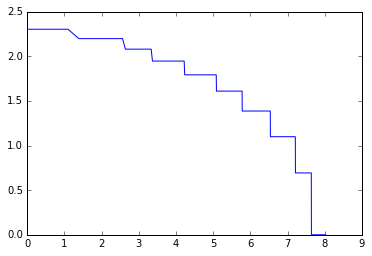


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203, 0.1511255239262338, 0.15172565454666986, 0.14560516665524079], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332, 0.12928775834908782, 0.15421519581831225], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.14664093187299154, 0.1396

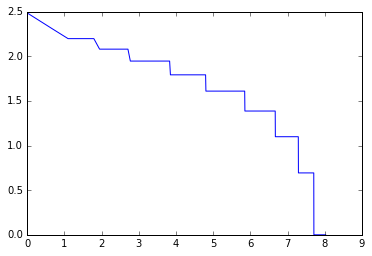


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203, 0.1511255239262338, 0.15172565454666986, 0.14560516665524079], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332, 0.12928775834908782, 0.15421519581831225, 0.15490254427707761], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.1466

In [6]:
ChiLaw = {}
Exp = {}

NodeList=[500,1000,2000,3000]
FBlist=[5]
VBlist=[10]
LayerList=[4,8,12]
InfluDist=[0.2]

ChiLaw['proj'] = {k:[] for k in NodeList+FBlist+VBlist+LayerList+InfluDist}
ChiLaw['alay'] = {k:[] for k in NodeList+FBlist+VBlist+LayerList+InfluDist}
Exp['proj'] = {k:[] for k in NodeList+FBlist+VBlist+LayerList+InfluDist}
Exp['alay'] = {k:[] for k in NodeList+FBlist+VBlist+LayerList+InfluDist}

print('\n', ChiLaw)
    
for rep in range(4):
    print('\n Repetition',rep)
    
    for NodesA in NodeList:
        for FB in FBlist:
            for VB in VBlist:
                for LayerA in LayerList:
                    for InDi in InfluDist:
                        
                        #yeah
                        print('\n Setup',NodesA,FB,VB,LayerA,InDi)
                        
                        MG = nx.MultiGraph()
                        TheTime = 0
                        RndFr=3
                        Nodes=50 #core set of 50 nodes
                        Iter=3
                        LayerC=2 #core layers
                        bd=0.05 #abstension strip
                        issue=np.random.random(FB+VB) #voting issue
                        Keys = [NodesA, FB, VB, LayerA, InDi]
                        print(' Time ', TheTime)


                        fbdist, fbpos, vbdist, vbpos, cbpos = [], [], [], [], []
                        for j in range(LayerA): #creates random vector in specified range
                            fbpos.append(list(np.random.randint(FB, size=np.random.randint(1,FB))))
                            fbdist.append(0.50*np.random.random()+0.2)
                        for j in range(LayerA): #creates random vector in specified range
                            vbpos.append(list(np.random.randint(VB, size=np.random.randint(1,VB))))
                            vbdist.append(0.50*np.random.random()+0.2)
                            cbpos.append(list(np.random.randint(VB, size=np.random.randint(1,VB))))
                        print('\n',fbdist,'\n',fbpos,'\n',vbdist,'\n',vbpos,'\n',cbpos)

                        Core(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime)
                        Grow(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime)
                        print(Rand(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime))

                        print(TheTime)

                        #AllVoteA(MG, issue)

                        BaseAnalisys(MG,LayerA)
                        
                        ydata=sorted(nx.degree(MG).values(),reverse=True)
                        #print(ydata)
                        '''
                        bins=60
                        Max=max(ydata)
                        Min=min(ydata)
                        Span = Max - Min
                        Size = Span/bins
                        #print('span',Span,'size',Size,'bins',bins,'min-max', Min,Max)#-------------------
                        yHist=[]
                        for i in range(bins+1):
                            yHist.append(0)
                        for i in ydata:
                            pos = int((i-Min)//Size)
                            if i-Min >= Size*pos and i-Min <= Size*(pos+1):
                                yHist[pos]=yHist[pos]+1
                            else:
                                print('error y ',i)#------------------- 
                        print('histdata',yHist)
                        '''
                        xdata=[]
                        for i in range(len(ydata)):
                            xdata.append(i+1)
                        logx = np.log(xdata)
                        logy = np.log(ydata)
                        #print('logdata:',logx, logy)
                        fitfunc = numpy.polyfit(logx, logy, 1)
                        print('param:',fitfunc)
                        for key in Keys:
                            Exp['proj'][key].append(fitfunc[0])
                        f_obs=logy
                        f_exp=[]
                        for x in logx:
                            f_exp.append(fitfunc[0]*x+fitfunc[1])
                        chisq=stats.chisquare(f_obs, f_exp, ddof=(len(ydata)-1), axis=0)
                        #print('\n',f_obs,'\n',f_exp)
                        print('\n chisq',chisq[0], chisq[1])
                        for key in Keys:
                            ChiLaw['proj'][key].append(chisq[0]/(len(ydata)-1)) 
                        plt.plot(logx,logy)
                        plt.show()
                        #-----------------------------------------average for layers
                        t0, t1 = [], []
                        for layer in range(LayerA):
                            G = ExtractLayer(MG, layer)
                            ydata=sorted(nx.degree(G).values(),reverse=True)
                            xdata=[]
                            for i in range(len(ydata)):
                                xdata.append(i+1)
                            logx = np.log(xdata)
                            logy = np.log(ydata)
                            fitfunc = numpy.polyfit(logx, logy, 1)
                            f_obs=logy
                            f_exp=[]
                            for x in logx:
                                f_exp.append(fitfunc[0]*x+fitfunc[1])
                            t0.append((stats.chisquare(f_obs, f_exp, ddof=(len(ydata)-1), axis=0)[0])/(len(ydata)-1))
                            t1.append(fitfunc[0])
                        for key in Keys:
                            Exp['alay'][key].append(np.mean(t1))
                            ChiLaw['alay'][key].append(np.mean(t0))
                         #-----------------------------------------end   
                                                       
                        
                        MG.clear()
                        print('\n',ChiLaw,'\n',Exp,'\n------------------------------------------')
                        
                        
    with open('PLTACB.pickle', 'wb') as handle:
        pickle.dump(ChiLaw, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [7]:
print('\n',ChiLaw)
print('\n', Exp)


 {'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203, 0.1511255239262338, 0.15172565454666986, 0.14560516665524079], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332, 0.12928775834908782, 0.15421519581831225, 0.15490254427707761], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.1466

In [ ]:
#VoteAnalysis(MG, issue, bd,1)
#VoteALayerLight(MG, issue, bd, 0, LayerA)

In [ ]:
#PollLayers(MG, 100, 100, bd, issue, 1, 2, 1)

In [ ]:
#PlotLayer(MG,LayerA)

In [ ]:
MG = nx.MultiGraph()
TheTime = 0
RndFr=3
Nodes=50 #core set of 50 nodes
Iter=3
LayerC=2 #core layers
bd=0.05 #abstension strip
issue=np.random.random(FB+VB) #voting issue
Keys = [NodesA, FB, VB, LayerA, InDi]
print(' Time ', TheTime)


fbdist, fbpos, vbdist, vbpos, cbpos = [], [], [], [], []
for j in range(LayerA): #creates random vector in specified range
    fbpos.append(list(np.random.randint(FB, size=np.random.randint(1,FB))))
    fbdist.append(0.50*np.random.random()+0.2)
for j in range(LayerA): #creates random vector in specified range
    vbpos.append(list(np.random.randint(VB, size=np.random.randint(1,VB))))
    vbdist.append(0.50*np.random.random()+0.2)
    cbpos.append(list(np.random.randint(VB, size=np.random.randint(1,VB))))
print('\n',fbdist,'\n',fbpos,'\n',vbdist,'\n',vbpos,'\n',cbpos)

Core(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime)

In [ ]:
ydata=sorted(nx.degree(MG).values(),reverse=True)

In [ ]:
print(ydata)


 Exp alay Nodes 

value 500 , average -0.259194461828 , st dev 0.0586389724658
value 1000 , average -0.308255055947 , st dev 0.0435511149243
value 2000 , average -0.330604789711 , st dev 0.0429610893605
value 3000 , average -0.330544272108 , st dev 0.0591767187938


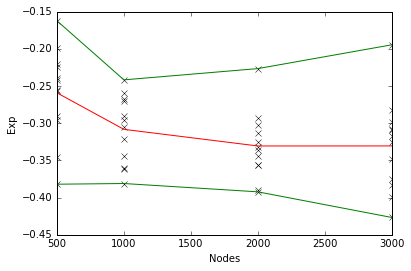


 Exp alay Layers 

value 4 , average -0.325977551106 , st dev 0.0650524630299
value 8 , average -0.305188349851 , st dev 0.0541534326584
value 12 , average -0.290283033739 , st dev 0.0524749452836


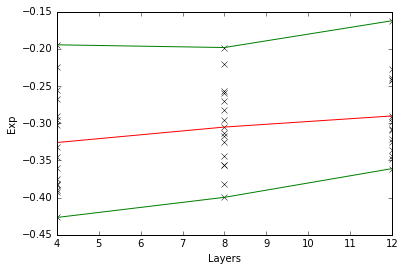


 Exp proj Nodes 

value 500 , average -0.510855885242 , st dev 0.0626816302189
value 1000 , average -0.538090917182 , st dev 0.0513967000142
value 2000 , average -0.529944023856 , st dev 0.0469501439163
value 3000 , average -0.523018684096 , st dev 0.0392915864817


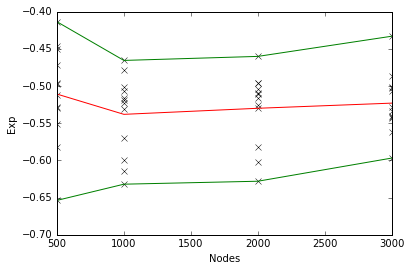


 Exp proj Layers 

value 4 , average -0.510436902826 , st dev 0.0561359573751
value 8 , average -0.540299776763 , st dev 0.0563265595739
value 12 , average -0.525695453193 , st dev 0.0356136828109


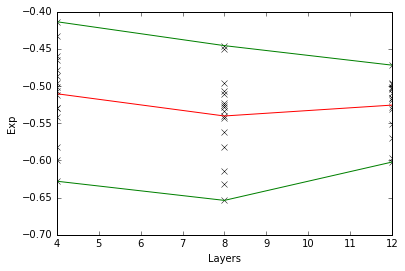


 ChiLaw alay Nodes 

value 500 , average 0.0621715306362 , st dev 0.0171501623457
value 1000 , average 0.0725486379293 , st dev 0.0131764052555
value 2000 , average 0.0790195044521 , st dev 0.0115782890352
value 3000 , average 0.0849581911163 , st dev 0.0197576147439


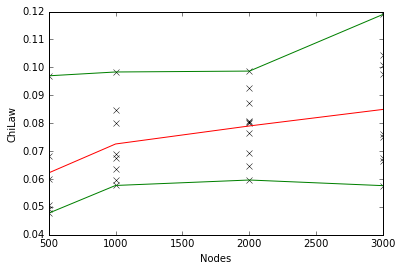


 ChiLaw alay Layers 

value 4 , average 0.0809456573119 , st dev 0.0210771587969
value 8 , average 0.0726658954204 , st dev 0.0142730805863
value 12 , average 0.0703435745161 , st dev 0.00662080956585


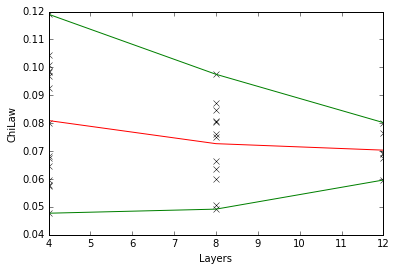


 ChiLaw proj Nodes 

value 500 , average 0.125723946439 , st dev 0.020783490911
value 1000 , average 0.140187745566 , st dev 0.0133514780909
value 2000 , average 0.147428920719 , st dev 0.00599656159247
value 3000 , average 0.141635320271 , st dev 0.0154475490177


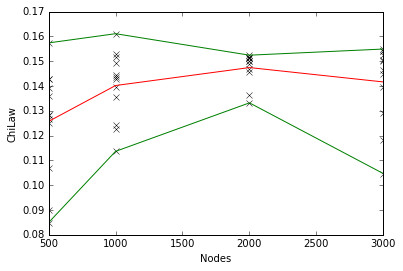


 ChiLaw proj Layers 

value 4 , average 0.131895361008 , st dev 0.0181525546777
value 8 , average 0.141487156307 , st dev 0.0188749867608
value 12 , average 0.14284943243 , st dev 0.00990365414696


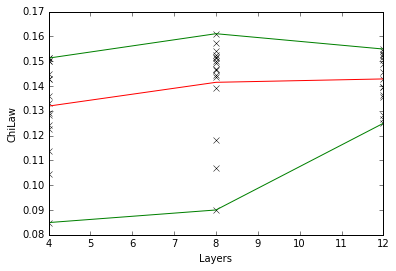

In [12]:
funname = ['Exp','ChiLaw']
dictionary = [Exp, ChiLaw]
#n=0
setting = ['alay','proj']
#m=1
varname = ['Nodes','Layers']
varlist = [NodeList, LayerList]
#o=1

for n in range(len(dictionary)):
    for m in range(len(setting)):
        for o in range(len(varlist)):

            temp0 = []
            temp1 = []
            temp2 = []
            temp3 = []
            print('\n', funname[n], setting[m], varname[o],'\n')

            for j in varlist[o]:
                #print(j)
                temp0.append(dictionary[n][setting[m]][j])
                temp1.append(np.nanmean(dictionary[n][setting[m]][j]))
                temp2.append(np.nanmax(dictionary[n][setting[m]][j]))
                temp3.append(np.nanmin(dictionary[n][setting[m]][j]))

                print('value',j,', average',np.nanmean(dictionary[n][setting[m]][j]),', st dev',np.nanstd(dictionary[n][setting[m]][j]))

            plt.plot(varlist[o],temp0, 'kx')
            plt.plot(varlist[o],temp1, 'r-')
            plt.plot(varlist[o],temp2, 'g-')
            plt.plot(varlist[o],temp3, 'g-')
            plt.ylabel(funname[n])
            plt.xlabel(varname[o])
            plt.savefig('PLTACB'+funname[n]+setting[m]+varname[o]+'.png',orientation='landscape',bbox_inches='tight',dpi='figure')
            plt.show()


In [19]:
with open('PLTACB.pickle', 'rb') as handle:
    ChiLaw = pickle.load(handle)

EOFError: Ran out of input

In [15]:
print(ChiLaw)

{'proj': {2000: [0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.15124941769314873, 0.15014626944371304, 0.15242741717683203, 0.1511255239262338, 0.15172565454666986, 0.14560516665524079], 3000: [0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.14486246405755782, 0.14664093187299154, 0.13968831480536811, 0.1499504776687301, 0.15232106254244779, 0.15066687924994332, 0.12928775834908782, 0.15421519581831225, 0.15490254427707761], 0.2: [0.12825490324471231, 0.090011217894826093, 0.14293373719359576, 0.1136435640092487, 0.16108753516484706, 0.13968851385020409, 0.13320297749111076, 0.14672756140927276, 0.14880608468787046, 0.1046814565046853, 0.11820297600086187, 0.15420378209983798, 0.13607084634377842, 0.157374457675026, 0.12666673468429965, 0.12445887805432974, 0.14360794655964101, 0.15186959363397831, 0.15017974470379547, 0.15148904921255663, 0.13646218167756188, 0.14486246405755782, 0.146640